# **Llamar librerias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import cv2 as cv

# **Llamar base de datos**

In [2]:
from google.colab import files
uploades=files.upload()

Saving videojuego.xlsx to videojuego.xlsx


## **Colocarle nombre a la base de datos**

In [3]:
names=["IDCompra","usuario","edad","genero","ID","NombreArticulo","precio"]
df_excel=pd.read_excel("videojuego.xlsx",skiprows=0,names=names) #skiprow si es excel se inicia con o y si es CSV es 1

# **Mostrar base de datos**

In [6]:
df_excel

,IDCompra,usuario,edad,genero,ID,NombreArticulo,precio
0,0,Lisim78,20.0,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40.0,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,24.0,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,24.0,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,23.0,Male,131.0,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21.0,Female,60.0,Wolf,3.54
776,776,Iral74,21.0,Male,164.0,Exiled Doomblade,1.63
777,777,Yathecal72,20.0,Male,67.0,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7.0,Male,101.0,Final Critic,4.19


# **Mostrar solo la columna Edad de la base de datos**

In [7]:
df_excel["edad"]

0      20.0
1      40.0
2      24.0
3      24.0
4      23.0
       ... 
775    21.0
776    21.0
777    20.0
778     7.0
779    24.0
Name: edad, Length: 780, dtype: float64

## **Mostrar instancia o fila de la base de datos**

In [8]:
df_excel.iloc[3]

IDCompra                      3
usuario           Chamassasya86
edad                       24.0
genero                     Male
ID                        100.0
NombreArticulo      Blindscythe
precio                     3.27
Name: 3, dtype: object

# **Mostrar la edad de la persona de la fila o instancia seleccionada**

In [34]:
print("la edad de la persona de la fila 5 es", df_excel["edad"].iloc[4], "años")

la edad de la persona de la fila 5 es 23.0 años


# **Mostrar longitud de la data con repetición**

In [39]:
print("la longitud de la data es", len(df_excel),"instancias")

la longitud de la data es 780 instancias


# **Punto N°1.** 

#**Recuento total de jugadores (Número total de jugadores)**

In [40]:
print("la cantidad de usuarios que se tienen en la data es",len(np.unique(df_excel["usuario"]))) #unique te da la delimitación de los atributos

la cantidad de usuarios que se tienen en la data es 576


In [41]:
print("la cantidad de usuarios que se tienen en la data es",len(df_excel["usuario"].unique())) #Otra forma de saber la cantidad de ususrios

la cantidad de usuarios que se tienen en la data es 576


In [13]:
recuento=pd.DataFrame(np.unique(df_excel["usuario"],return_counts=True)).T # Saber quienes se duplicaron y su frecuencia

In [18]:
recuento.sort_values(by=1,ascending=False) # Se ordenan de forma descendente, es decir, de mayor a menor

,0,1
360,Lisosia93,5
275,Iral74,4
246,Idastidru52,4
75,Asur53,3
274,Inguron55,3
...,...,...
207,Hala31,1
206,Haisurra41,1
203,Hailaphos89,1
202,Haestyphos66,1


In [19]:
recuento_s=recuento.sort_values(by=1,ascending=False) # se ordenan de forma descendente, es decir, de mayor a menor y lo llamo recuento_s

In [20]:
recuento_s.reset_index() # ordenar nuevamente la tabla con nuevos indices

,index,0,1
0,360,Lisosia93,5
1,275,Iral74,4
2,246,Idastidru52,4
3,75,Asur53,3
4,274,Inguron55,3
...,...,...,...
571,207,Hala31,1
572,206,Haisurra41,1
573,203,Hailaphos89,1
574,202,Haestyphos66,1


hay 576 usuarios distintos de los cuales Lisosia93 compro 5 veces, IraI74 4 veces, Idastidru52 4 veces, Asur53 3 veces, Inguron55 3 veces.

# **Identificar el nombre de la ubicación seleccionada**

In [31]:
print("el nombre de la ubicación 2 es",recuento_s[0].iloc[1]) #identificar el nombre de la ubicación 2

el nombre de la ubicación 2 es Iral74


In [32]:
print("el nombre de la ubicación 5 es",recuento_s[0].iloc[4]) #identificar el nombre de la ubicación 5

el nombre de la ubicación 5 es Inguron55


# **Identificar exactamente lo que compró el usuario seleccionado**

In [25]:
df_excel[df_excel["usuario"]=="Lisosia93"]  #Estadistica Bayesiana

,IDCompra,usuario,edad,genero,ID,NombreArticulo,precio
74,74,Lisosia93,25.0,Male,89.0,"Blazefury, Protector of Delusions",4.64
120,120,Lisosia93,25.0,Male,24.0,Warped Fetish,3.81
224,224,Lisosia93,25.0,Male,157.0,"Spada, Etcher of Hatred",4.80
603,603,Lisosia93,25.0,Male,141.0,Persuasion,3.19
609,609,Lisosia93,25.0,Male,40.0,Second Chance,2.52


In [26]:
df_excel[df_excel["usuario"]=="Lisosia93"]["NombreArticulo"]   #Que exactamente compro el usuario Lisosia93, estadistica Bayesiana

74     Blazefury, Protector of Delusions
120                        Warped Fetish
224              Spada, Etcher of Hatred
603                           Persuasion
609                        Second Chance
Name: NombreArticulo, dtype: object

In [27]:
df_excel[df_excel["usuario"]==recuento_s[0].iloc[0]]["NombreArticulo"]   #Que exactamente compro el usuario Lisosia93, estadistica Bayesiana

74     Blazefury, Protector of Delusions
120                        Warped Fetish
224              Spada, Etcher of Hatred
603                           Persuasion
609                        Second Chance
Name: NombreArticulo, dtype: object

In [28]:
recuento_s.to_excel("datoscompras.xlsx") # para enviarlo al drive en excel

#**Punto N°2**

#**a. Número de artículos únicos**

In [30]:
print("el número de artículos únicos es",len(df_excel["ID"].unique())) # numero de articulos unicos

el número de artículos únicos es 183


# **b. Precio medio de compra**

In [44]:
print("el precio medio de compra es",np.round(df_excel["precio"].mean(),2)) 

el precio medio de compra es 3.05


# **c. Número total de compras**

In [45]:
print("el número total de compra es",len(df_excel))

el número total de compra es 780


# **d. Ingresos totales**

In [47]:
print("los ingresos totales son de",df_excel["precio"].sum(),"US")

los ingresos totales son de 2379.77 US


In [49]:
print("el precio minimo es",df_excel["precio"].min(),"US")

el precio minimo es 1.0 US


# **Punto N°3 - Datos demograficos por genero**

# **a. Porcentaje y número de jugadores masculinos**

In [ ]:
df_excel[df_excel["genero"]=="Male"] #Datos demograficos por genero % y jugadores masculinos

,IDCompra,usuario,edad,genero,ID,NombreArticulo,precio
0,0,Lisim78,20.0,Male,108.0,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40.0,Male,143.0,Frenzied Scimitar,1.56
2,2,Ithergue48,24.0,Male,92.0,Final Critic,4.88
3,3,Chamassasya86,24.0,Male,100.0,Blindscythe,3.27
4,4,Iskosia90,23.0,Male,131.0,Fury,1.44
...,...,...,...,...,...,...,...
774,774,Jiskjask80,11.0,Male,101.0,Final Critic,4.19
776,776,Iral74,21.0,Male,164.0,Exiled Doomblade,1.63
777,777,Yathecal72,20.0,Male,67.0,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7.0,Male,101.0,Final Critic,4.19


In [51]:
print("el total de jugadores masculino es",len(np.unique(df_excel[df_excel["genero"]=="Male"]["usuario"])))

el total de jugadores masculino es 484


In [63]:
print("el porcentaje de jugadores masculino equivale a",np.round(len(np.unique(df_excel[df_excel["genero"]=="Male"]["usuario"]))/576*100,2),"%")

el porcentaje de jugadores masculino equivale a 84.03 %


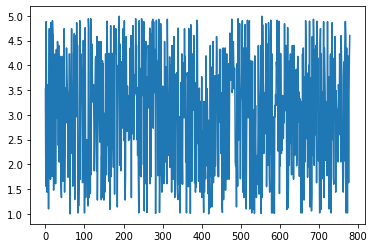

In [57]:
df_excel["precio"].plot() #un grafico de un solo atributo

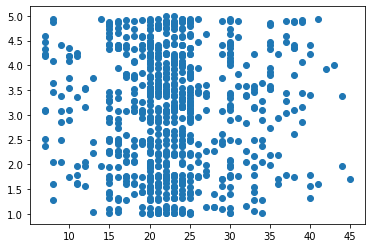

In [56]:
plt.scatter(df_excel["edad"],df_excel["precio"]) #grafico con edad y precio

(array([652.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,   0., 113.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

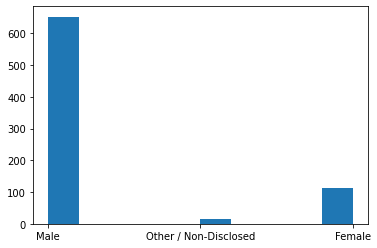

In [55]:
plt.hist(df_excel["genero"])

# **b. Porcentaje y número de jugadores femeninos**

In [58]:
df_excel[df_excel["genero"]=="Female"] #Datos demograficos por genero % y jugadores femeninos

,IDCompra,usuario,edad,genero,ID,NombreArticulo,precio
15,15,Lisassa64,21.0,Female,98.0,"Deadline, Voice Of Subtlety",2.89
18,18,Reunasu60,22.0,Female,82.0,Nirvana,4.90
38,38,Reulae52,10.0,Female,116.0,Renewed Skeletal Katana,4.18
41,41,Assosia88,20.0,Female,7.0,"Thorn, Satchel of Dark Souls",1.33
55,55,Phaelap26,25.0,Female,84.0,Arcane Gem,3.79
...,...,...,...,...,...,...,...
731,731,Eudanu84,22.0,Female,12.0,Dawne,1.02
740,740,Reunasu60,22.0,Female,127.0,"Heartseeker, Reaver of Souls",3.92
754,754,Pheosurllorin41,23.0,Female,79.0,"Alpha, Oath of Zeal",4.05
767,767,Ilmol66,8.0,Female,92.0,Final Critic,4.88


In [60]:
print("el total de jugadores femeninas es",len(np.unique(df_excel[df_excel["genero"]=="Female"]["usuario"]))) 

el total de jugadores femeninas es 81


In [62]:
print("el porcentaje de jugadores femeninas equivale a",np.round(len(np.unique(df_excel[df_excel["genero"]=="Female"]["usuario"]))/576*100,2),"%") 

el porcentaje de jugadores femeninas equivale a 14.06 %


# **c. Porcentaje y recuento de otros / no revelados**

In [77]:
print("el total de jugadores no revelados es",len(np.unique(df_excel[df_excel["genero"]=="Other / Non-Disclosed"]["usuario"]))) 

el total de jugadores no revelados es 11


In [76]:
print("el porcentaje de jugadores no revelados equivale a",np.round(len(np.unique(df_excel[df_excel["genero"]=="Other / Non-Disclosed"]["usuario"]))/576*100,2),"%") 

el porcentaje de jugadores no revelados equivale a 1.91 %


# **Punto N°4. Análisis de compras**

#**Recuento de compras**

In [73]:
print("los hombres compraron",len(df_excel[df_excel["genero"]=="Male"]["precio"]),"veces")

los hombres compraron 652 veces


In [75]:
print("Las mujeres compraron",len(df_excel[df_excel["genero"]=="Female"]["precio"]),"veces") 

Las mujeres compraron 113 veces


In [78]:
print("las personas no revelados compraron",len(df_excel[df_excel["genero"]=="Other / Non-Disclosed"]["precio"]),"veces")

las personas no revelados compraron 15 veces


In [ ]:
pd.DataFrame(np.unique(df_excel["genero"],return_counts=True))  # clasificar y contar por generos en una tabla

,0,1,2
0,Female,Male,Other / Non-Disclosed
1,113,652,15


In [ ]:
np.unique(df_excel["genero"],return_counts=True)[1] # me da el vector 

array([113, 652,  15])

# **Diagrama de tortas**

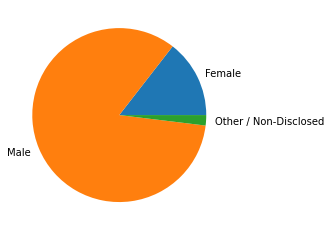

In [79]:
plt.pie(np.unique(df_excel["genero"],return_counts=True)[1],
        labels=np.unique(df_excel["genero"],return_counts=True)[0])
plt.show()

# **b,c,d. Precio medio de compra**

In [83]:
print("el precio medio de compra de hombres es",np.round(df_excel[df_excel["genero"]=="Male"]["precio"].mean(),2),"US")

el precio medio de compra de hombres es 3.02 US


In [ ]:
for i in np.unique(df_excel["genero"]):
  print(i,np.round(df_excel[df_excel["genero"]==i]["precio"].mean(),2)) 
print("=======================================================")
for i in np.unique(df_excel["genero"]):
  print(i,np.round(df_excel[df_excel["genero"]==i]["precio"].sum(),2)) 

Female 3.2
Male 3.02
Other / Non-Disclosed 3.35
Female 361.94
Male 1967.64
Other / Non-Disclosed 50.19


# **Punto N°5 - 6**

# **Recuento de compras**

In [96]:
print("las personas entre 7 y 11 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=7) & (df_excel["edad"]<11),:]),"veces")

las personas entre 7 y 11 años de edad compraron 32 veces


In [97]:
print("las personas entre 11 y 15 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=11) & (df_excel["edad"]<15),:]),"veces")

las personas entre 11 y 15 años de edad compraron 19 veces


In [98]:
print("las personas entre 15 y 19 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=15) & (df_excel["edad"]<19),:]),"veces")

las personas entre 15 y 19 años de edad compraron 113 veces


In [99]:
print("las personas entre 19 y 23 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=19) & (df_excel["edad"]<23),:]),"veces")

las personas entre 19 y 23 años de edad compraron 254 veces


In [100]:
print("las personas entre 23 y 27 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=23) & (df_excel["edad"]<27),:]),"veces")

las personas entre 23 y 27 años de edad compraron 207 veces


In [101]:
print("las personas entre 27 y 31 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=27) & (df_excel["edad"]<31),:]),"veces")

las personas entre 27 y 31 años de edad compraron 63 veces


In [102]:
print("las personas entre 31 y 35 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=31) & (df_excel["edad"]<35),:]),"veces")

las personas entre 31 y 35 años de edad compraron 38 veces


In [103]:
print("las personas entre 35 y 39 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=35) & (df_excel["edad"]<39),:]),"veces")

las personas entre 35 y 39 años de edad compraron 35 veces


In [104]:
print("las personas entre 39 y 43 años de edad compraron",len(df_excel.loc[(df_excel["edad"]>=39) & (df_excel["edad"]<43),:]),"veces")

las personas entre 39 y 43 años de edad compraron 15 veces


# **Valor Total de las compras por edad**

In [106]:
nedades=np.sort(np.unique(df_excel["edad"]))

iE=nedades[0]

fE=nedades[0]

n=len(nedades)

for i in nedades:

    fE+=4

    if(fE<nedades[n-1]):

        print("Entre ",iE," y ",fE)

        print(df_excel.loc[(df_excel["edad"]>=iE) & (df_excel["edad"]<=fE),:]["precio"].sum())

    iE=fE

Entre  7.0  y  11.0
127.75000000000001
Entre  11.0  y  15.0
156.60000000000002
Entre  15.0  y  19.0
412.89
Entre  19.0  y  23.0
973.8199999999999
Entre  23.0  y  27.0
661.47
Entre  27.0  y  31.0
205.27999999999997
Entre  31.0  y  35.0
155.71000000000004
Entre  35.0  y  39.0
147.67
Entre  39.0  y  43.0
54.5


# **Precio medio de compra**

In [107]:
nedades=np.sort(np.unique(df_excel["edad"]))

iE=nedades[0]

fE=nedades[0]

n=len(nedades)

for i in nedades:

    fE+=4

    if(fE<nedades[n-1]):

        print("Entre ",iE," y ",fE)

        print(df_excel.loc[(df_excel["edad"]>=iE) & (df_excel["edad"]<=fE),:]["precio"].mean())

    iE=fE

Entre  7.0  y  11.0
3.275641025641025
Entre  11.0  y  15.0
2.9000000000000004
Entre  15.0  y  19.0
3.03595588235294
Entre  19.0  y  23.0
3.0337071651090346
Entre  23.0  y  27.0
3.048248847926267
Entre  27.0  y  31.0
2.9325714285714284
Entre  31.0  y  35.0
2.9944230769230775
Entre  35.0  y  39.0
3.6017073170731706
Entre  39.0  y  43.0
3.40625


# **Promedio de compras totales por persona por grupo de edad**

In [128]:
print("el promedio de compras totales por personas entre 7 y 11 años es",np.round((3.28/len(df_excel.loc[(df_excel["edad"]>=7) & (df_excel["edad"]<11),:]))*100))

el promedio de compras totales por personas entre 7 y 11 años es 10.0


In [125]:
print("el promedio de compras totales por personas entre 11 y 15 años es",np.round((2.90/len(df_excel.loc[(df_excel["edad"]>=11) & (df_excel["edad"]<15),:]))*100))

el promedio de compras totales por personas entre 11 y 15 años es 15.0


In [127]:
print("el promedio de compras totales por personas entre 15 y 19 años es",np.round((3.03/len(df_excel.loc[(df_excel["edad"]>=15) & (df_excel["edad"]<19),:]))*100))

el promedio de compras totales por personas entre 15 y 19 años es 3.0


In [129]:
print("el promedio de compras totales por personas entre 19 y 23 años es",np.round((3.03/len(df_excel.loc[(df_excel["edad"]>=19) & (df_excel["edad"]<23),:]))*100))

el promedio de compras totales por personas entre 19 y 23 años es 1.0


In [130]:
print("el promedio de compras totales por personas entre 23 y 27 años es",np.round((3.04/len(df_excel.loc[(df_excel["edad"]>=23) & (df_excel["edad"]<27),:]))*100))

el promedio de compras totales por personas entre 23 y 27 años es 1.0


In [134]:
print("el promedio de compras totales por personas entre 27 y 31 años es",np.round((2.93/len(df_excel.loc[(df_excel["edad"]>=27) & (df_excel["edad"]<31),:]))*100))

el promedio de compras totales por personas entre 27 y 31 años es 5.0


In [135]:
print("el promedio de compras totales por personas entre 31 y 35 años es",np.round((2.99/len(df_excel.loc[(df_excel["edad"]>=31) & (df_excel["edad"]<35),:]))*100))

el promedio de compras totales por personas entre 31 y 35 años es 8.0


In [136]:
print("el promedio de compras totales por personas entre 35 y 39 años es",np.round((3.60/len(df_excel.loc[(df_excel["edad"]>=35) & (df_excel["edad"]<39),:]))*100))

el promedio de compras totales por personas entre 35 y 39 años es 10.0


In [137]:
print("el promedio de compras totales por personas entre 39 y 43 años es",np.round((3.40/len(df_excel.loc[(df_excel["edad"]>=39) & (df_excel["edad"]<43),:]))*100))

el promedio de compras totales por personas entre 39 y 43 años es 23.0


# **Precio maximo de la base de datos**

In [48]:
print("el precio maximo es",df_excel["precio"].max(),"US")

el precio maximo es 4.99 US


# **Coloco la columna de precio de mayor a menor**

In [146]:
new=pd.concat([df_excel["precio"],df_excel["usuario"]],axis=1)
new1=new.sort_values("precio",ascending=False)
new1.head()

,precio,usuario
554,4.99,Dyally87
189,4.99,Hiasri33
110,4.94,Ririp86
246,4.94,Lirtilsa71
493,4.94,Chanirrasta87


In [140]:
np.max(new)

precio          4.99
usuario    Zontibe81
dtype: object

In [142]:
m=(new1[(new1["precio"]>=4.94)& new1["usuario"]])
m

,precio,usuario
554,4.99,Dyally87
189,4.99,Hiasri33
110,4.94,Ririp86
246,4.94,Lirtilsa71
493,4.94,Chanirrasta87
116,4.94,Lassilsala30
231,4.94,Yarithsurgue62


# **Precio medio de la compra**

In [143]:
m.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


precio    4.954286
dtype: float64

# **valor total de las compras**

In [144]:
m.sum()

precio                                                 34.68
usuario    Dyally87Hiasri33Ririp86Lirtilsa71Chanirrasta87...
dtype: object

# **Coloco la columna de precio de mayor a menor con las columnas usuario y nombrearticulo**

In [145]:
data=pd.concat([df_excel["precio"],df_excel["usuario"],df_excel["NombreArticulo"]],axis=1)
data1=data.sort_values("precio",ascending=False) # Ubico una de las columnas en este caso la de precio de mayor a menor
data1.head(5)

,precio,usuario,NombreArticulo
554,4.99,Dyally87,Stormfury Mace
189,4.99,Hiasri33,Stormfury Mace
110,4.94,Ririp86,"Mercy, Katana of Dismay"
246,4.94,Lirtilsa71,"Mercy, Katana of Dismay"
493,4.94,Chanirrasta87,"Mercy, Katana of Dismay"


In [148]:
m1= data1.query("precio>=4.94")
m1

,precio,usuario,NombreArticulo
554,4.99,Dyally87,Stormfury Mace
189,4.99,Hiasri33,Stormfury Mace
110,4.94,Ririp86,"Mercy, Katana of Dismay"
246,4.94,Lirtilsa71,"Mercy, Katana of Dismay"
493,4.94,Chanirrasta87,"Mercy, Katana of Dismay"
116,4.94,Lassilsala30,"Mercy, Katana of Dismay"
231,4.94,Yarithsurgue62,"Mercy, Katana of Dismay"


In [150]:
data2=df_excel.sort_values("precio",ascending=False)
data2.query("precio>=4.94")

,IDCompra,usuario,edad,genero,ID,NombreArticulo,precio
554,554,Dyally87,22.0,Male,63.0,Stormfury Mace,4.99
189,189,Hiasri33,23.0,Male,63.0,Stormfury Mace,4.99
110,110,Ririp86,25.0,Male,139.0,"Mercy, Katana of Dismay",4.94
246,246,Lirtilsa71,24.0,Male,139.0,"Mercy, Katana of Dismay",4.94
493,493,Chanirrasta87,14.0,Male,139.0,"Mercy, Katana of Dismay",4.94
116,116,Lassilsala30,21.0,Male,139.0,"Mercy, Katana of Dismay",4.94
231,231,Yarithsurgue62,26.0,Male,139.0,"Mercy, Katana of Dismay",4.94


# **Articulos más populares**

In [153]:
data3=df_excel.groupby("ID",dropna=False).agg(Nombre_Articulo=("NombreArticulo","unique"),Numero_Compras=("ID","count"), Precio=("precio","unique"),Valor_Total=("precio","sum"))
data4=data3.sort_values("Numero_Compras",ascending=False)
data4.head()

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
145.0,[Fiery Glass Crusader],9,[4.58],41.22
108.0,"[Extraction, Quickblade Of Trembling Hands]",9,[3.53],31.77
82.0,[Nirvana],9,[4.9],44.10
19.0,"[Pursuit, Cudgel of Necromancy]",8,[1.02],8.16


# **Articulos más rentables**

In [154]:
data5=data3.sort_values("Valor_Total",ascending=False)
data5.head()

,Nombre_Articulo,Numero_Compras,Precio,Valor_Total
ID,,,,
178.0,"[Oathbreaker, Last Hope of the Breaking Storm]",12,[4.23],50.76
82.0,[Nirvana],9,[4.9],44.10
145.0,[Fiery Glass Crusader],9,[4.58],41.22
92.0,[Final Critic],8,[4.88],39.04
103.0,[Singed Scalpel],8,[4.35],34.80


In [155]:
recuento_s.to_excel("recuentos.xlsx")